<a href="https://colab.research.google.com/github/PiyushGithub24/Machine_Learning_Algorithms/blob/main/implement_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing some library

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
#uploading height-weight.csv file
df=pd.read_csv('/content/height-weight.csv')

In [199]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


#Scatter plot to see the relation b/w the attributes

Text(0.5, 1.0, 'Scatter plot')

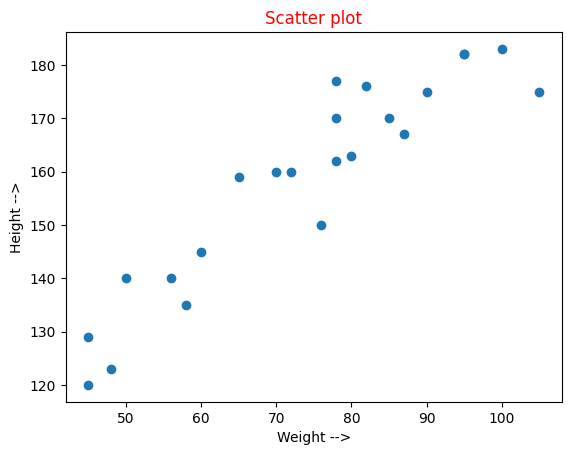

In [200]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight -->')
plt.ylabel('Height -->')
plt.title('Scatter plot',color='red')

In [201]:
#Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


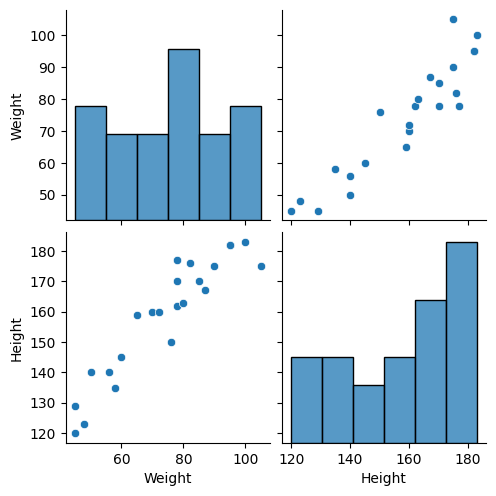

In [202]:
import seaborn as sns
sns.pairplot(df)

##Devide the df into dependent and independent features

In [203]:
x=df[['Weight']]  ##independent feature should be data frame or two dimensional array
y=df['Height']  # y ie dependent feature can be series or 1D array

x.head()


,Weight
0,45
1,58
2,48
3,60
4,70


In [204]:
x_series=df['Weight']
type(x_series)
np.array(x_series).shape

(23,)

In [205]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [206]:
np.array(y).shape

(23,)

In [207]:
print(x.shape)
print(y.shape)

(23, 1)
(23,)


##Train test split

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [210]:
print(x_train.shape)
print(y_train.shape)

(17, 1)
(17,)


##Performing Standardization operation on independent variable


In [211]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [212]:
#Before standardizing the data
print("x_train is:-\n",x_train)
print("\nx_test is:-\n",x_test)

x_train is:-
     Weight
1       58
13     100
5       78
2       48
11      95
20      45
3       60
4       70
18      76
16      50
21      56
22      72
7       90
10      82
14      85
19      87
6       80

x_test is:-
     Weight
15      78
9       78
0       45
8       95
17      65
12     105


In [213]:
x_train=scaler.fit_transform(x_train)   #every value of x train will replaced with the z-score value so that the mean=0 and SD=1 of x_train
#while calucating mean nad SD of x_tarin it does'nt use the data of x_test to avoid "data leakage" so that it does not previously know about the data of x_test

In [214]:
x_test=scaler.transform(x_test)    # Here we use only transform() b/c we want to use the SD and mean of the x_tain

In [215]:
#after standardizing the data
print("x_train is:-\n",x_train)
print("\nx_test is:-\n",x_test)

x_train is:-
 [[-0.87662801]
 [ 1.66773133]
 [ 0.33497168]
 [-1.48242785]
 [ 1.36483141]
 [-1.6641678 ]
 [-0.75546804]
 [-0.1496682 ]
 [ 0.21381171]
 [-1.36126788]
 [-0.99778797]
 [-0.02850823]
 [ 1.06193149]
 [ 0.57729161]
 [ 0.75903157]
 [ 0.88019153]
 [ 0.45613165]]

x_test is:-
 [[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


##Applyingsimple linear regression


In [216]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [217]:
regression.fit(x_train,y_train)

LinearRegression()

In [218]:
print("reg coeff or slope :", regression.coef_)
print("reg intercept :", regression.intercept_)

reg coeff or slope : [17.2982057]
reg intercept : 156.47058823529412


Text(0, 0.5, 'y_train -->')

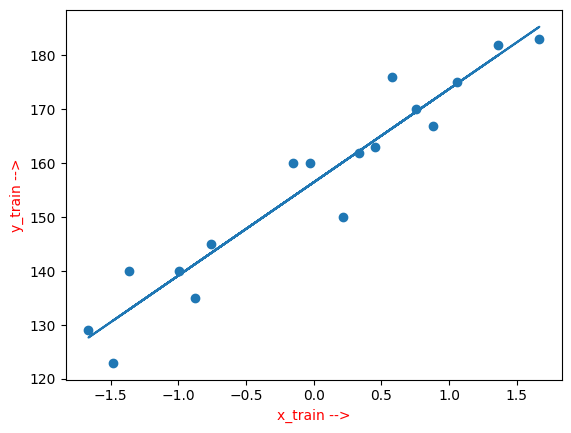

In [219]:
#plotting best fit line for training data
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))
plt.xlabel("x_train -->",color='red')
plt.ylabel("y_train -->",color='red')

#prediction of test data
1.pred_height_op=intercept + coeff*(ip_height)

2.y_pred_test=   156.47   +  17.29*( x_test)

In [220]:
#Prediction for test data
y_pred=regression.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [221]:
#Performane metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [222]:
print("mean_squared_error: ",mse)  # mse is most affected by outliers
print("mean_absolute_error: ",mae)
print("root_mean_squared_error: ",rmse)

mean_squared_error:  114.84069295228699
mean_absolute_error:  9.66512588679501
root_mean_squared_error:  10.716374991212605


#R-Squared =SSR/SST
where

SSR= sum square of residuals

SST=sum square of total

In [223]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R-squared =",score)

R-squared = 0.7360826717981276


#Adjusted R Squared =1-[(1-R2)(n-1)/(n-k-1)]


where

R2 =R Squared

n=no. of observations

k=no. of predictor variables

In [224]:
print(x_test.shape)
print(x_test.shape[0])#do you see the diffn since x_test is a 2D
len(x_test)

(6, 1)
6


6

In [225]:
a_r2_score=1-(((1-float(score))*(len(x_test)-1))/(len(x_test)-x_test.shape[1]-1))
print("Adjusted_R-squared =",a_r2_score)

Adjusted_R-squared = 0.6701033397476595


#Linear Regression using OLS

In [226]:
import statsmodels.api as sm

In [227]:
model=sm.OLS(y_train,x_train).fit()

In [228]:
prediction=model.predict(x_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [229]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                       0.664
Time:                        15:00:15   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#prediction for new data

In [230]:
regression.predict([[70]]) # in this condition we are getting to much value for predicted height is 1367 cm b/c we
#does not performed standardization operation on incoming data which is very necessry

array([1367.34498754])

In [233]:
regression.predict(scaler.transform([[70]]))  # now it is good b/c it gives o/p of 153.88 cm of the given i/p weight of 70kg.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([153.88159699])

In [234]:
print("Congratulation !!\nYou successfully implemented Simple Linear Regression.")

Congratulation !!
You successfully implemented Simple Linear Regression.
